<a href="https://colab.research.google.com/github/ljs7463/study-repository/blob/master/Data%20analysis%20practice/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/titanic_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

코드에 대한 설명및 분석내용은 코드 바로 아래 칸에 위치

# 데이터 불러오기

In [786]:
from google.colab import drive
drive.mount('/content/Mydrive')

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


In [787]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv('/content/Mydrive/MyDrive/datascience/train.csv')
test_df = pd.read_csv('/content/Mydrive/MyDrive/datascience/test.csv')
combine = [train_df, test_df]

# 데이터 확인하기

**가설 : 좋은 티켓일수록 생존율이 높으며, 상대적으로 약자인 아이와 여성의 생존율이 높을것이다.**

In [788]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [789]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**1. Age, Cabin, Embarked 에 NaN값이 존재, test셋에는 Fare에 1개의 NaN값이 존재**

**2. Cabin은 NaN값이 매우 많은 데이터 이며 예측에 있어 중요한 데이터가 아니기 때문에 컬럼을 지워도 될것 같다.**

**3. Ticket 데이터 또한 생존률과 연관이 적어보이므로 지워도 될것 같다.**

**4.  Name, Sex, Age, Fare, Embarked 는 인코딩 작업이 필요 해 보인다.** 

In [790]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [791]:
train_df[['SibSp', 'Parch']].head(15)

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,3,1
8,0,2
9,1,0


**1. Sibsp 와 Parch는 한개의 컬럼으로 줄일 수 있을것 같다.**

**2. Embarked는 위의 자료만으로 확실하게 필요한 데이터 라는 여부를 판단하기 힘들어 시각화를 통해 비교후 결정하기로 한다.**

In [792]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**train_df 데이터셋과 한가지 다른점은 'Fare'에 NaN값이 하나 존재한다**

In [793]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**1. 생존을 못한 승객이 더 많다는 것을 알 수 있다.**

**2. 3등급 티켓을 가진 승객이 가장 많다는것을 알 수 있다.**

**3. 평균 나이가 29세 이지만 최고령 탑승자의 나이가 80 인 것을 보아 편차가 많은것 같다.**

**4. 대부분 혼자 왔지만 8명까지도 같이 탑승한 승객이 있다.**

**5. 요금 역시 편차가 심한것을 확인 할 수 있다.**

In [794]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [795]:
train_df.describe(include ='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"West, Mrs. Edwy Arthur (Ada Mary Worth)",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [796]:
test_df.describe(include ='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Dean, Miss. Elizabeth Gladys Millvina""""",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


**1. 남성 탑승객이 여성 탑승객 보다 많은 것을 알 수 있다.**

**2. 대부분의 승객은 Southampton에서 탑승한 것을 알 수 있다.**

# 시각화를 통한 데이터 탐색하기

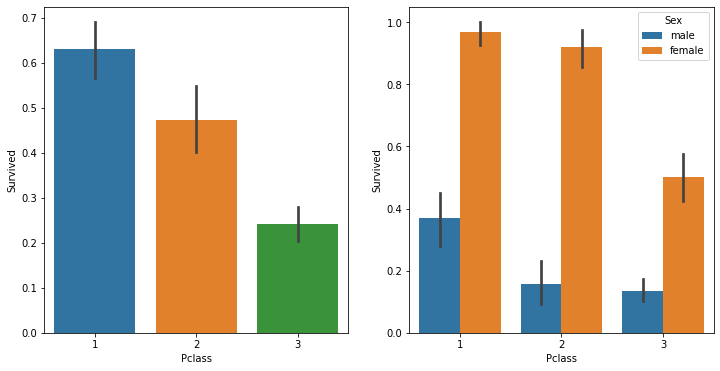

In [797]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.barplot(x = 'Pclass', y = 'Survived', ax = axes[0], data = train_df)
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', ax = axes[1], data = train_df)

**티켓의 등급이 높을 수록 생존율이 높으며, 그 중에서도 여성이 높다는 것을 알 수 있다.**

In [798]:
train_df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


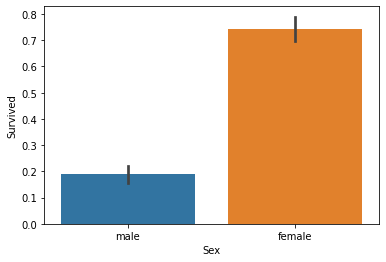

In [799]:
sns.barplot(x = 'Sex', y = 'Survived', data = train_df)

**여성의 생존율이 훨씬 높다는 것을 알게 되었다.**

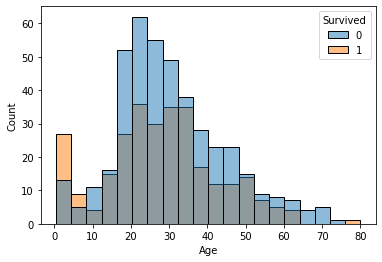

In [800]:
sns.histplot(x = 'Age',hue = 'Survived', data = train_df)

**어린아이의 생존률이 가장 높은것을 알 수 있다.**

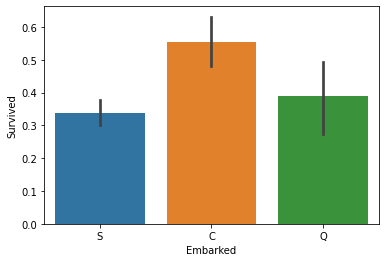

In [801]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train_df)

지역이 다르다고 생존률과 연관성을 찾지 못하여 해당 컬럼은 삭제 해야 할것같다.


Fare 같은 데이터는 전처리 이후 시각화 할 예정

# 데이터 전처리

## Name 컬럼 전처리

In [802]:
# train_df
Name = []

for i in train_df['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name.append(h[:-1])

Name

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [803]:
# test_df
Name2 = []

for i in test_df['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name2.append(h[:-1])

Name2

['Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Master',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Ms',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'M

In [804]:
# train_df
train_df['Name'] = pd.Series(Name)
train_df['Name']

# test_df
test_df['Name'] = pd.Series(Name2)
test_df['Name'] 

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 418, dtype: object

In [805]:
train_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'L', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

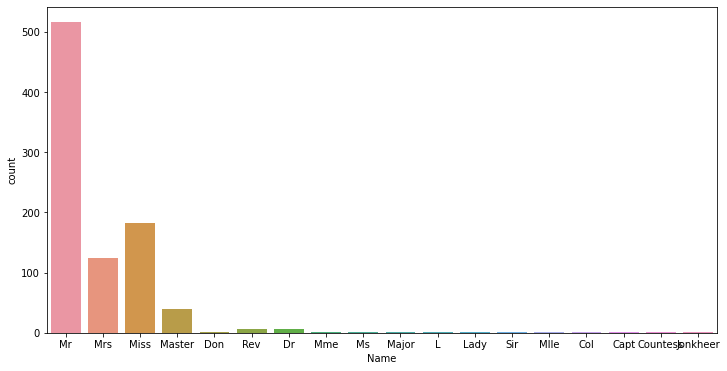

In [806]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Name',data = train_df)

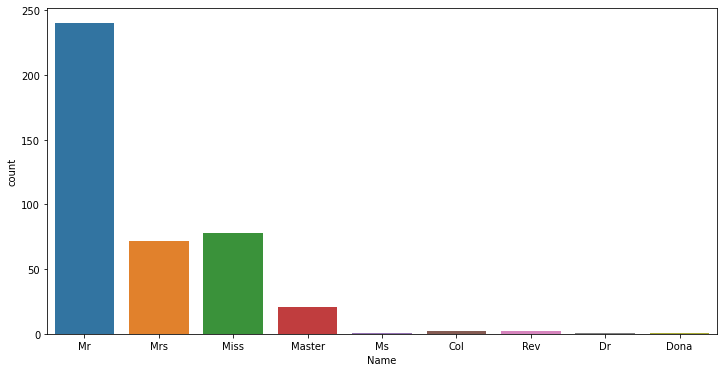

In [807]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Name',data = test_df)

Mr, Mrs, Miss, Master 를 제외한 다른 이름들은 극히 적은 인원수 를 가지고 있으므로 Others로 통일한다.

In [808]:
for all_data in combine:
  all_data['Name'] =all_data['Name'].replace (['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'L', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer','Dona'],'Others') # test셋에만 Dona라는 이름이 있으므로 주의

test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,Others,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


In [809]:
train_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [810]:
test_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [811]:
# 다수의 이름 순서대로 mapping

name_mapping = {'Mr' : 0, 'Miss' : 1, 'Mrs' : 2, 'Master' : 3, 'Others' : 4}
for all_data in combine:
  all_data['Name'] = all_data['Name'].map(name_mapping).astype(int)

# train_df
test_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,2,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,2,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,4,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,0,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,0,male,NaN,0,0,359309,8.0500,NaN,S


## Sex 컬럽 전처리

In [812]:
sex_mapping = {'male' : 0, 'female' : 1}
for all_data in combine:
  all_data['Sex'] = all_data['Sex'].map(sex_mapping).astype(int)
  
#train_df  
test_df



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,2,1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,2,1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,4,1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,0,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,0,0,NaN,0,0,359309,8.0500,NaN,S


**남성을 0 , 여성을 1로 전처리 해주었다.**

In [813]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [814]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


## Age 컬럼 전처리

**현재 까지 알고있는 전처리 방법론은  첫 번째로, 해당 행을 지우는 방법과 두 번째로, 평균 값 혹은 0 으로 바꾸는 방법, 세 번째로 다른 컬럼들과의 관계를 이용하여 예측하는 방법 이렇게 세가지이다.**

**그 중 Age는 생존율 예측에 있어서 중요한 데이터 이므로 약 900개중 200개 가량의 데이터를 지우는 것은 좋지 않으며, 평균 혹은 0으로 바꾸어 주는것 또한 데이터의 상태를 변형시키기 때문에 세 번째 방법인 다른 컬럼들과의 관계를 통해 그 관계의 평균 값으로 Age를 예측하는 방법을 사용할 것이다.**

In [815]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [816]:
for all_df in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = all_df[(all_df['Sex'] == i) & \
                                  (all_df['Pclass'] == j+1)]['Age'].dropna()
          
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            all_df.loc[ (all_df.Age.isnull()) & (all_df.Sex == i) & (all_df.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    all_df['Age'] = all_df['Age'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,2,1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,2,1,35,1,0,113803,53.1000,C123,S
4,5,0,3,0,0,35,0,0,373450,8.0500,NaN,S


In [817]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 83.7+ KB


In [818]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 36.0+ KB


In [819]:
train_df['Age'].tail(50)

841    16
842    30
843    34
844    17
845    42
846    25
847    35
848    28
849    35
850     4
851    74
852     9
853    16
854    44
855    18
856    45
857    51
858    24
859    25
860    41
861    21
862    48
863    21
864    24
865    42
866    27
867    31
868    25
869     4
870    26
871    47
872    33
873    47
874    28
875    15
876    20
877    19
878    25
879    56
880    25
881    33
882    22
883    28
884    25
885    39
886    27
887    19
888    21
889    26
890    32
Name: Age, dtype: int64

In [820]:
for total_df in combine:
  total_df['Age'] = pd.cut(total_df['Age'], 5)

train_df['Age']

0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] <
                                    (64.0, 80.0]]

인코딩 방법소개

In [821]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for total_df in combine:
  le.fit(total_df['Age'])
  total_df['Age'] = le.transform(total_df['Age'])

train_df['Age'].tail(50)


841    0
842    1
843    2
844    1
845    2
846    1
847    2
848    1
849    2
850    0
851    4
852    0
853    0
854    2
855    1
856    2
857    3
858    1
859    1
860    2
861    1
862    2
863    1
864    1
865    2
866    1
867    1
868    1
869    0
870    1
871    2
872    2
873    2
874    1
875    0
876    1
877    1
878    1
879    3
880    1
881    2
882    1
883    1
884    1
885    2
886    1
887    1
888    1
889    1
890    1
Name: Age, dtype: int64

**(-0.08, 16.0) = 0**

**(16.0, 32.0) = 1**

**(32.0, 48.0) = 2**

**(48.0, 64.0) = 3**

**(64.0, 80.0) = 4**         

## Ticket  컬럼전처리

In [822]:
for all_data in combine:
  all_data = all_data.drop('Ticket', axis = 1, inplace = True)

# train_df
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,0,2,0,0,7.8292,NaN,Q
1,893,3,2,1,3,1,0,7.0000,NaN,S
2,894,2,0,0,4,0,0,9.6875,NaN,Q
3,895,3,0,0,1,0,0,8.6625,NaN,S
4,896,3,2,1,1,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1,0,0,8.0500,NaN,S
414,1306,1,4,1,2,0,0,108.9000,C105,C
415,1307,3,0,0,2,0,0,7.2500,NaN,S
416,1308,3,0,0,1,0,0,8.0500,NaN,S


Ticket 데이터는 생존율에 영향이 없다고 판단하여 컬럼을 삭제하였다.

## SibSp 와 Parch 컬럼 결합

In [823]:
for all_data in combine:
  all_data['Alone'] = all_data['SibSp'] + all_data['Parch']
  all_data = all_data.drop(['SibSp', 'Parch'], axis = 1,inplace=True)
   
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,1,7.2500,NaN,S,1
1,2,1,1,2,1,2,71.2833,C85,C,1
2,3,1,3,1,1,1,7.9250,NaN,S,0
3,4,1,1,2,1,2,53.1000,C123,S,1
4,5,0,3,0,0,2,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,0,1,13.0000,NaN,S,0
887,888,1,1,4,1,1,30.0000,B42,S,0
888,889,0,3,1,1,1,23.4500,NaN,S,3
889,890,1,1,1,0,1,30.0000,C148,C,0


In [824]:
for all_data in combine:
  all_data.loc[all_data['Alone']==0,'Alone'] = 0
  all_data.loc[all_data['Alone']!=0,'Alone'] = 1

train_df



,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,1,7.2500,NaN,S,1
1,2,1,1,2,1,2,71.2833,C85,C,1
2,3,1,3,1,1,1,7.9250,NaN,S,0
3,4,1,1,2,1,2,53.1000,C123,S,1
4,5,0,3,0,0,2,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,0,1,13.0000,NaN,S,0
887,888,1,1,4,1,1,30.0000,B42,S,0
888,889,0,3,1,1,1,23.4500,NaN,S,1
889,890,1,1,1,0,1,30.0000,C148,C,0


In [825]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Alone        891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [826]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Cabin        91 non-null     object 
 7   Embarked     418 non-null    object 
 8   Alone        418 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 29.5+ KB


## Fare 컬럼 전처리

In [827]:
train_df['Fare'].head(15)

0      7.2500
1     71.2833
2      7.9250
3     53.1000
4      8.0500
5      8.4583
6     51.8625
7     21.0750
8     11.1333
9     30.0708
10    16.7000
11    26.5500
12     8.0500
13    31.2750
14     7.8542
Name: Fare, dtype: float64

In [828]:
for total_df in combine:
  total_df['Fare'] = total_df['Fare'].fillna(total_df['Fare'].median()).round()

test_df['Fare']

0        8.0
1        7.0
2       10.0
3        9.0
4       12.0
       ...  
413      8.0
414    109.0
415      7.0
416      8.0
417     22.0
Name: Fare, Length: 418, dtype: float64

NaN값이 한개 이므로 중간값을 채워주었다.

In [829]:
# train_df[['Fare','Survived']].groupby('Fare',as_index = False).mean().tail(20)
# train_df[['Fare','Survived']].groupby('Fare',as_index = False).count().tail(20)
train_df[['Fare','Survived']].groupby('Fare',as_index = False).mean().head(20)

,Fare,Survived
0,0.0,0.066667
1,4.0,0.000000
2,5.0,0.000000
3,6.0,0.000000
4,7.0,0.169231
5,8.0,0.228155
6,9.0,0.148148
7,10.0,0.302326
8,11.0,0.833333
9,12.0,0.571429


In [830]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Alone        891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [831]:
#for total_df in combine:
#  total_df['Fare'] = pd.qcut(total_df['Fare'],4)
  

##train_df  
#test_df

In [832]:
#train_df['Fare'].unique()

In [833]:
#test_df['Fare'].unique()

높은 Fare의 분포가 현저히 작으므로 pd.cut을 통한 일정한 간격보다는 pd.qcut을 통해 같은 인원수로 묶어주었다.

In [834]:
for total_df in combine:
  total_df.loc[total_df['Fare'] <= 8.0 ,'Fare'] = 0
  total_df.loc[(total_df['Fare'] > 8.0) & (total_df['Fare'] <= 14.0) ,'Fare'] = 1
  total_df.loc[(total_df['Fare'] > 14.0) & (total_df['Fare'] <= 31.75),'Fare'] = 2
  total_df.loc[(total_df['Fare'] > 31.75) & (total_df['Fare'] <= 512.0),'Fare'] = 3

  total_df['Fare'] = total_df['Fare'].astype(int)
  
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,1,0,NaN,S,1
1,2,1,1,2,1,2,3,C85,C,1
2,3,1,3,1,1,1,0,NaN,S,0
3,4,1,1,2,1,2,3,C123,S,1
4,5,0,3,0,0,2,0,NaN,S,0


In [835]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,1,0,NaN,S,1
1,2,1,1,2,1,2,3,C85,C,1
2,3,1,3,1,1,1,0,NaN,S,0
3,4,1,1,2,1,2,3,C123,S,1
4,5,0,3,0,0,2,0,NaN,S,0


In [836]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,892,3,0,0,2,0,NaN,Q,0
1,893,3,2,1,3,0,NaN,S,1
2,894,2,0,0,4,1,NaN,Q,0
3,895,3,0,0,1,1,NaN,S,0
4,896,3,2,1,1,1,NaN,S,1


In [837]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Cabin        204 non-null    object
 8   Embarked     889 non-null    object
 9   Alone        891 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 69.7+ KB


In [838]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    int64 
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Cabin        91 non-null     object
 7   Embarked     418 non-null    object
 8   Alone        418 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 29.5+ KB


## Cabin 컬럼 전처리

In [839]:
for total_df in combine:
  total_df = total_df.drop('Cabin', axis = 1, inplace = True)

test_df

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,0,0,2,0,Q,0
1,893,3,2,1,3,0,S,1
2,894,2,0,0,4,1,Q,0
3,895,3,0,0,1,1,S,0
4,896,3,2,1,1,1,S,1
...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1,0,S,0
414,1306,1,4,1,2,3,C,0
415,1307,3,0,0,2,0,S,0
416,1308,3,0,0,1,0,S,0


In [840]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     889 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 62.8+ KB


In [841]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    int64 
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Embarked     418 non-null    object
 7   Alone        418 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 26.2+ KB


## Embarked 컬럼 전처리

In [842]:
train_df['Embarked'].mode()

0    S
dtype: object

In [843]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     891 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 62.8+ KB


In [844]:
embarked_mapping = {'S' : 0, 'C' : 1, 'Q' : 2}

for total_df in combine:
  total_df['Embarked'] = total_df['Embarked'].map(embarked_mapping).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,0,0,1,0,0,1
1,2,1,1,2,1,2,3,1,1
2,3,1,3,1,1,1,0,0,0
3,4,1,1,2,1,2,3,0,1
4,5,0,3,0,0,2,0,0,0


In [845]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Name         891 non-null    int64
 4   Sex          891 non-null    int64
 5   Age          891 non-null    int64
 6   Fare         891 non-null    int64
 7   Embarked     891 non-null    int64
 8   Alone        891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


In [846]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Name         418 non-null    int64
 3   Sex          418 non-null    int64
 4   Age          418 non-null    int64
 5   Fare         418 non-null    int64
 6   Embarked     418 non-null    int64
 7   Alone        418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


전처리 이후 Fare의 시각화

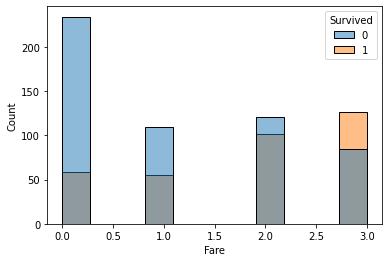

In [847]:
sns.histplot(x = 'Fare', hue = 'Survived', data = train_df)
# 더 정돈되게 시각화 하는 방법 찾기

In [848]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Name         891 non-null    int64
 4   Sex          891 non-null    int64
 5   Age          891 non-null    int64
 6   Fare         891 non-null    int64
 7   Embarked     891 non-null    int64
 8   Alone        891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


In [854]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,0,0,1,0,0,1
1,2,1,1,2,1,2,3,1,1
2,3,1,3,1,1,1,0,0,0
3,4,1,1,2,1,2,3,0,1
4,5,0,3,0,0,2,0,0,0
5,6,0,3,0,0,1,0,2,0
6,7,0,1,0,0,3,3,0,0
7,8,0,3,3,0,0,2,0,1
8,9,1,3,2,1,1,1,0,1
9,10,1,2,2,1,0,2,1,1


In [853]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,0,0,2,0,2,0
1,893,3,2,1,3,0,0,1
2,894,2,0,0,4,1,2,0
3,895,3,0,0,1,1,0,0
4,896,3,2,1,1,1,0,1
5,897,3,0,0,0,1,0,0
6,898,3,1,1,1,0,2,0
7,899,2,0,0,1,2,0,1
8,900,3,2,1,1,0,1,0
9,901,3,0,0,1,2,0,1


# 머신러닝을 통한 학습

## 간단한 설명
머신러닝은 정말 많은 기법들이 있다. 그 중에서 이번 타이타닉 셋으로 이용할 수 있는 것으로 줄여보면 Classification(분류) 과 Regression(회귀) 그리고 Supervised(지도학습) 세가지의 교집합에 들어가는 기법들 중 가장 유리한 기법을 사용해야한다.

위에서 말한 교집합에 해당하는 기법을 적어보았다.

1. Logistic Regression
2. KNN or K-Nearest Neighbors
3. Support Vector Machines
4. Native Bayes classifier
5. Decision Tree
6. Random Forrest
7. Perceptron
8. Artifical neural network
9. RVM or Relevance Vector Machine